<a href="https://colab.research.google.com/github/kavanvasani/JPG-to-PNG-Converter/blob/master/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog breed identifier
123
125
126
## 1.Problem
Take a pic of a dog and know the breed.

## 2.Data
Data comes from kaggle.

## 3.Evaluation
Evaluation is a file with prediction probs of each breed.

## 4.Features
We're dealing with images.
* Unstructured data so use deep\transfer learning.
* 120 diff breeds of dogs.
* 10000+ images in train and test sets each.

In [ ]:
#unzipping into google drive
#!unzip "drive/My Drive/dog-breed/dog-breed-identification.zip" -d "drive/My Drive/dog-breed/"

**Get workspace ready**
* import tensorflow 2.x
* import tensorflow hub
* Make sure we're using gpu

In [ ]:
#import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ",tf.__version__)
print("Tf hub version: ",hub.__version__)

# Check for gpu availability
print("GPU , available!!" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.2.0
Tf hub version:  0.8.0
GPU , available!!


## Getting our data ready
data has to be in mumerical format, so turn data into tensors

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/dog-breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     7019dc9a063a19bd2f7568f80ede854f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


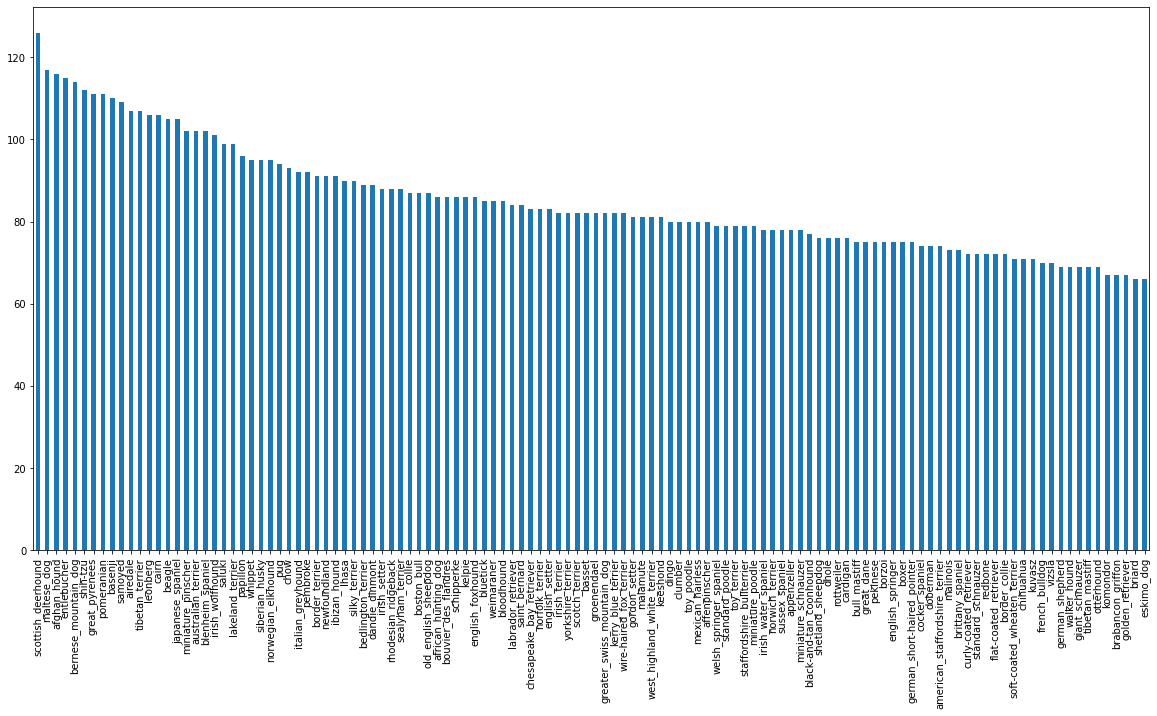

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

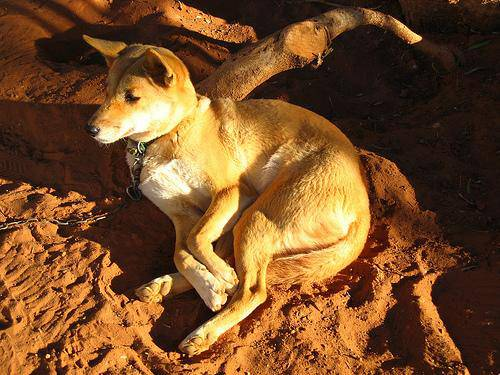

In [ ]:
from IPython.display import Image
Image("drive/My Drive/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#  Getting image and their labels

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
filenames = ["drive/My Drive/dog-breed/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/dog-breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/My Drive/dog-breed/train/"))==len(filenames):
  print("filename len matches")
else:
  print("filename len does not match")

filename len matches


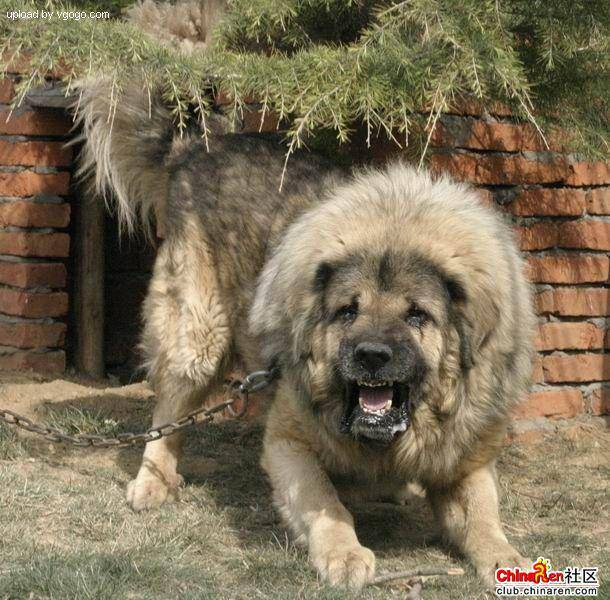

In [ ]:
Image(filenames[9000])

Since now we have image filepaths in a list lets prep our labels

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels)==len(filenames):
  print("no of labels = no of filenames")
else:
  print("nos dont match")

no of labels = no of filenames


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
bool_labels = [label==unique_breeds for label in labels]
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turning bool array into int
print(labels[0])
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(bool_labels[0].argmax()) #index where label occirs in bool array
print(bool_labels[0].astype(int)) #1 where label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

In [ ]:
# Setup X&y
X = filenames
y = bool_labels

In [ ]:
# We start exp with 1000 images and then increase
NUM_IMAGES = 1000 #@param {type:"slider", min:100, max:10000, step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)

len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2],y_train[:2]

(['drive/My Drive/dog-breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog-breed/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing images\turning images to tensors

In [ ]:
# Convert image to np array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a func for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  # turn the image into num tensor with 3 color channels
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize image to 224,224
  image = tf.image.resize(image,size = [IMG_SIZE,IMG_SIZE])

  return image

## Turning our data into batches

In [ ]:
# Turn data to tensor tuples = (images,labels)
# Create a simple func to do this

def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [ ]:
(process_image(X[42])),tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Create a func to turn data to batches
# Define the batch size
BATCH_SIZE = 32

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  # If the data is a test dataset we dont have labels
  if test_data:
    print("Creating data set batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only filepaths and no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is valid set, we dont need to shuffle it
  elif valid_data:
    print("Creating valid data set batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                            tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches..")
    #Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # Shuffle pathnames and labels before mapping image processor func
    data = data.shuffle(buffer_size=len(X))

    # Create image,label tuples, also turn image path into a preprocessed image
    data = data.map(get_image_label)
    #Turn into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
#Create training and val data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Create training data batches..
Creating valid data set batches..


In [ ]:
#Check out the diff attributes of data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a func to view images as data batches
def show_images(images,labels):
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

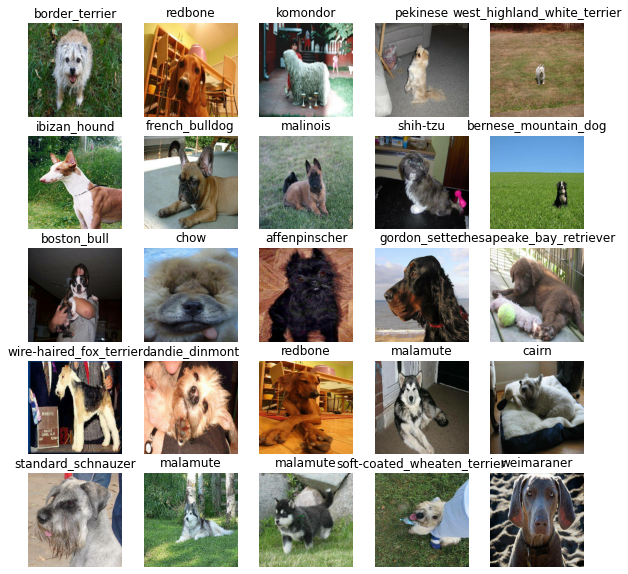

In [ ]:
show_images(train_images,train_labels)

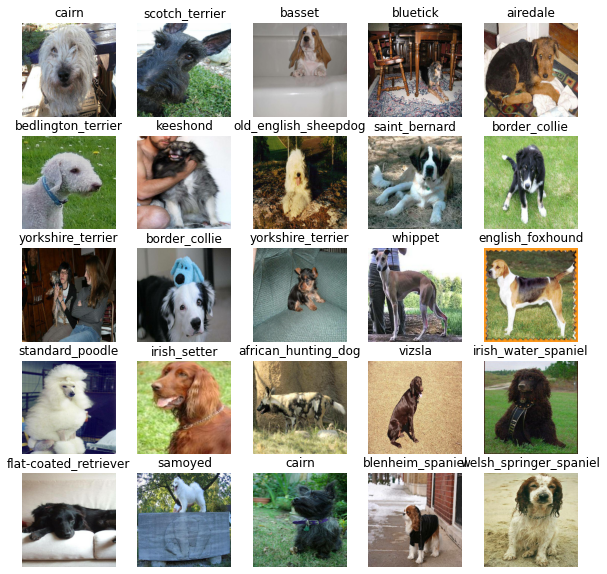

In [ ]:
val_images,val_labels = next(val_data.as_numpy_iterator())
show_images(val_images,val_labels)

## Building a model
* Define input shape
* Define output shape
* URL of model we want to use from tensorflow
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,color channels

OUTPUT_SHAPE = len(unique_breeds)

#Setup model URl ffrom tensorflowhub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Put the ip op and models into keras deep learning model.

In [ ]:
# Create a func for above that takes ip and op shape and model as params.
# Defines the layers in the keras model in sequential manner.
# Compiles the model and says how it should be evaluated and used.

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with : ",MODEL_URL)

  #Setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), # Layer 1 (ip layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation = "softmax") # Layer 2 (op layer)
                               ])
  
  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

    #Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Callback
they are helper funcs a model can use during training to save its progress, check progress or stop training if model stops improving.

create two callbacks
one for tensorboard that tracks the progress and other for early stopping that prevents model from training for too long

In [ ]:
#TensorBoard Callback

%load_ext tensorboard

In [ ]:
import datetime

#Create a func to build a tensorboard callback
def create_tensorboard():
  logdir = os.path.join("drive/My Drive/dog-breed/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                      patience = 3)

## Training a model

First model trains on 1000 images to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

* Create a func to train  a model
* Setup tensorboard callback
* Call the fit func on ur model passing the training and valid data,no of epochs and callbacks 
* Return the model

In [ ]:
def train():
  model = create_model()

  #Create new tensorboard session everytime we train
  tensorboard = create_tensorboard()

  #Fit the model to the data passing it the callbacks
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data=val_data,
            validation_freq = 1,
            callbacks = [tensorboard,early_stopping])
  
  return model

In [ ]:
#Fit the model
model = train()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 284s 11s/step - loss: 4.4897 - accuracy: 0.1075 - val_loss: 3.4091 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 6s 254ms/step - loss: 1.5851 - accuracy: 0.7050 - val_loss: 2.1817 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 6s 252ms/step - loss: 0.5496 - accuracy: 0.9375 - val_loss: 1.7091 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 6s 255ms/step - loss: 0.2445 - accuracy: 0.9875 - val_loss: 1.5073 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 6s 255ms/step - loss: 0.1403 - accuracy: 0.9987 - val_loss: 1.4316 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 6s 258ms/step - loss: 0.0985 - accuracy: 1.0000 - val_loss: 1.3957 - val_accuracy: 0.6650
Epoch 7/100
25/25 [============================

## Checking the tensorboard logs
the tensorboard magic func will access the logs directory we reated and visualize its contents

In [ ]:
%tensorboard --logdir drive/My\ Drive/dog-breed/logs

<IPython.core.display.Javascript object>

# Making and evaluating predictions using training model

In [ ]:
#Make predictions on valid data
predictions = model.predict(val_data,verbose = 1)
predictions

7/7 [==============================] - 1s 180ms/step


array([[7.12853298e-03, 7.99895381e-04, 4.00042301e-03, ...,
        1.12941873e-03, 1.36641529e-05, 4.63981088e-03],
       [9.28531308e-03, 5.80294989e-04, 6.83717709e-03, ...,
        1.22413432e-04, 3.86981759e-03, 6.20982377e-04],
       [1.41714463e-06, 3.06197535e-06, 4.55226218e-05, ...,
        9.11773895e-06, 1.86592115e-05, 6.44567481e-05],
       ...,
       [3.40726983e-05, 2.76293558e-05, 9.00810846e-05, ...,
        9.10426388e-06, 4.90036145e-05, 9.24943470e-06],
       [7.57615454e-03, 1.00140425e-03, 5.11228980e-04, ...,
        6.76702839e-05, 7.79001202e-05, 1.82766374e-02],
       [1.99295650e-03, 1.11852576e-04, 9.42005019e-04, ...,
        1.28821246e-02, 1.25752157e-03, 1.67640115e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
#First prediction
index = 81
print(predictions[index])
print(f"Max value (probability) : {np.max(predictions[index])}")
print(f"Sum :{np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.3422508e-03 1.4753308e-04 1.7448455e-03 7.4294699e-06 8.1871375e-02
 7.3942416e-03 1.8769121e-03 2.1591621e-02 7.3455833e-03 2.1378986e-04
 1.7429935e-05 7.0813857e-04 3.3064981e-03 7.0347253e-04 8.8518038e-03
 2.3223121e-04 2.6648364e-04 7.4265304e-04 6.5457448e-06 7.0754415e-04
 1.8517690e-05 1.3378233e-04 4.5995772e-04 1.3504495e-04 2.1114526e-02
 1.5248544e-05 1.4792828e-04 3.2632127e-03 1.3406369e-03 1.0589119e-01
 2.4327214e-04 1.3494249e-03 1.6697978e-03 6.7168986e-03 4.2314110e-05
 6.3962268e-04 7.6446071e-04 5.8403164e-01 9.7833574e-03 3.2783865e-03
 2.4983594e-03 1.0505899e-05 9.7483753e-05 1.8034031e-03 1.2839295e-03
 3.7462381e-05 1.7787928e-04 9.8966539e-06 4.8896327e-05 3.9933313e-02
 1.7721546e-05 9.5450077e-06 7.8917015e-04 2.3118464e-06 3.2059003e-03
 9.4637356e-04 8.4654009e-03 2.3047333e-03 8.0541111e-05 6.6195801e-04
 4.7126510e-03 1.7716240e-05 5.0338171e-05 2.3243805e-04 1.1712764e-04
 1.6088723e-05 4.3686960e-04 2.7549338e-05 1.5283318e-04 7.3317921e-04
 4.354

In [ ]:
#Turn pred probs intotheir respective label
def get_pred_label(prediction_probs):
  return unique_breeds[np.argmax(prediction_probs)]


#Get a predicted label based on an array of pred probs
pred_label = get_pred_label(predictions[8])
pred_label

'saint_bernard'

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

as our val data is still in batch dataset, we'll have to unbatchify it to make preds on the val images and then  compare those preds to val labels

In [ ]:
#Create a func to unbatch a batch dataset
images_ = []
labels_ = []

#loop through unbatched data
for image,label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0],labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

In [ ]:
#Create a func to do the above
def unbatchify(data):
  images = []
  labels = []
  
  for image , label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels

val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probs,labels,images,n=1):
  pred_prob,true_label,image = prediction_probs[n],labels[n],images[n]

  #Get pred label
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color="green"
  else:
    color="red"
  
  plt.title("Predicted:{},{:2.0f}% ,True:{}".format(pred_label,np.max(pred_prob*100),
            true_label),
            color=color)
  


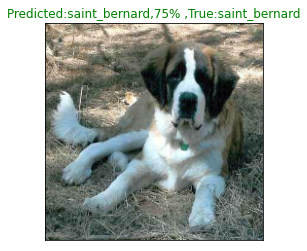

In [ ]:
plot_pred(prediction_probs=predictions,labels=val_labels,images=val_images,n=8)

## Function to visualize top 10 predictions

In [ ]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label = prediction_probabilities[n],labels[n]

  pred_label = get_pred_label(pred_prob)

  #Find top 10 indexes
  top_10_indexes = pred_prob.argsort()[-10:][::-1]
  
  #Find top 10 pred values
  top_10_values = pred_prob[top_10_indexes]

  #Find top 10 pred labels
  top_10_labels = unique_breeds[top_10_indexes]

  #Setup plot
  top_plot = plt.bar(np.arange(len(top_10_values)),
                     top_10_values,color="grey")
  plt.xticks(np.arange(len(top_10_labels)),
            labels = top_10_labels,
            rotation = "vertical")
  
  if np.isin(true_label,top_10_labels):
    top_plot[np.argmax(top_10_labels == true_label)].set_color("green")
  else:
    pass

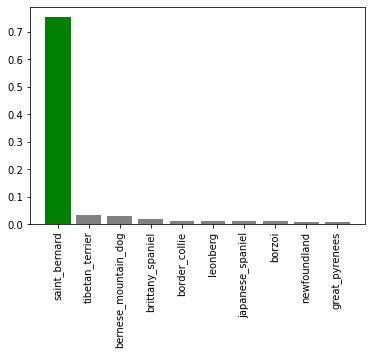

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels= val_labels,n=8)

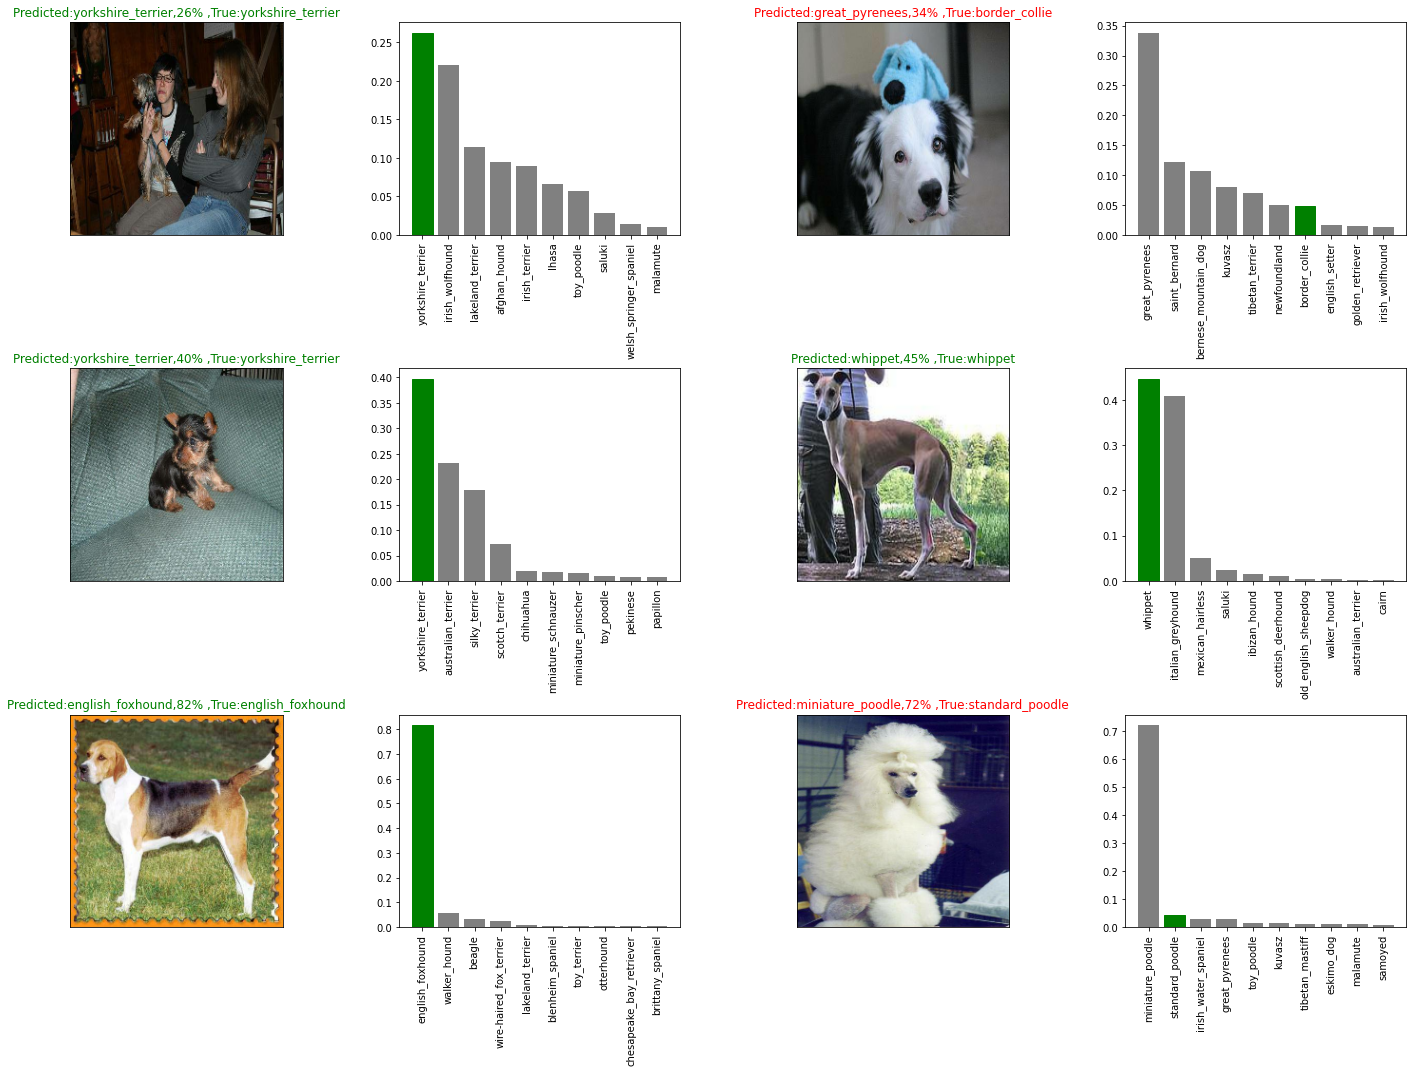

In [ ]:
i_multiplier = 10
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probs=predictions,
            labels= val_labels,images = val_images,n=i+i_multiplier)
  
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

# Save and reload a model

In [ ]:
#Create a func to save a model
def save_model(model,suffix=None):
  modeldir = os.path.join("drive/My Drive/dog-breed/models",
                          datetime.datetime.now().strftime("%T$m%d-%H%M%s"))
  
  modelpath = modeldir + "-" + suffix + ".h5" #save format
  print(f"Saving model to : {modelpath}")
  model.save(modelpath)
  return modelpath

In [ ]:
#Func to load a model
def load_model(modelpath):
  model = tf.keras.models.load_model(modelpath,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#Save model trained on 1000 images
save_model(model,suffix = "1000-images-mobilenetv2-adam")

Saving model to : drive/My Drive/dog-breed/models/12:27:30$m16-12271594902450-1000-images-mobilenetv2-adam.h5


'drive/My Drive/dog-breed/models/12:27:30$m16-12271594902450-1000-images-mobilenetv2-adam.h5'

In [ ]:
#Load a trained model
loaded_1000_image_model = load_model("drive/My Drive/dog-breed/models/07:42:49$m16-07421594885369-1000-images-mobilenetv2-adam.h5")

In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 151ms/step - loss: 1.2941 - accuracy: 0.6800


[1.294060468673706, 0.6800000071525574]

In [ ]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 156ms/step - loss: 1.3072 - accuracy: 0.6050


[1.307169795036316, 0.6050000190734863]

## Training on the full dataset

In [ ]:
len(X_train),len(y_train)

(800, 800)

In [ ]:
len(X_val),len(y_val)

(200, 200)

In [ ]:
#Create a databatch with the full dataset
full_data = create_data_batches(X,y)

Create training data batches..


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
#Create a model for full dataset
full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
#Create full model callbacks
full_model_tensorboard = create_tensorboard()
#No validation set when training on all the data
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",patience=3)

In [ ]:
#Fit the model on the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3462s 11s/step - loss: 1.3168 - accuracy: 0.6791
Epoch 2/100
320/320 [==============================] - 74s 232ms/step - loss: 0.3953 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 73s 230ms/step - loss: 0.2330 - accuracy: 0.9370
Epoch 4/100
320/320 [==============================] - 74s 231ms/step - loss: 0.1514 - accuracy: 0.9628
Epoch 5/100
320/320 [==============================] - 75s 234ms/step - loss: 0.1070 - accuracy: 0.9776
Epoch 6/100
320/320 [==============================] - 74s 232ms/step - loss: 0.0759 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 74s 230ms/step - loss: 0.0582 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 73s 229ms/step - loss: 0.0461 - accuracy: 0.9955
Epoch 9/100
320/320 [==============================] - 75s 236ms/step - loss: 0.0375 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 75s 234m

In [ ]:
save_model(full_model,suffix = "all-images-model")

Saving model to : drive/My Drive/dog-breed/models/14:08:54$m16-14081594908534-all-images-model.h5


'drive/My Drive/dog-breed/models/14:08:54$m16-14081594908534-all-images-model.h5'

In [ ]:
loaded_full_model = load_model("drive/My Drive/dog-breed/models/14:08:54$m16-14081594908534-all-images-model.h5")

# Making predictions on the test dataset

In [ ]:
#Load the test images filenames
test_path = "drive/My Drive/dog-breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/dog-breed/test/e85b19a69be67eaef9fe58b7e689ee81.jpg',
 'drive/My Drive/dog-breed/test/ee345e7f5ac2d3cf979a17183437faa7.jpg',
 'drive/My Drive/dog-breed/test/f0b2e9d1bf7deeb89dd199177f2fda90.jpg',
 'drive/My Drive/dog-breed/test/ed1d8dfbebbb70b252cd71e165ea3d76.jpg',
 'drive/My Drive/dog-breed/test/f1c41fe76fb9962343d34c58efb384cd.jpg',
 'drive/My Drive/dog-breed/test/eb8e9637c329ca7ad7937be0ec94e80d.jpg',
 'drive/My Drive/dog-breed/test/ef4501591ee2433e06ff5312df879593.jpg',
 'drive/My Drive/dog-breed/test/f3d4b8b4cd50260c89a6d5b29a7e9243.jpg',
 'drive/My Drive/dog-breed/test/edca6e9a7f6f35f9b0313d8aaaf844be.jpg',
 'drive/My Drive/dog-breed/test/e8e6e731b4afb84faf9c022a67935867.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
#Convert filenames to data batches using the func
test_data = create_data_batches(test_filenames,test_data = True)

Creating data set batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
#Make predictions on test data using loaded model
test_predictions = loaded_full_model.predict(test_data,verbose = 1)

324/324 [==============================] - 4505s 14s/step


In [ ]:
#Save preds to a csv file
np.savetxt("drive/My Drive/dog-breed/preds_array.csv",test_predictions,delimiter = ",")

In [ ]:
#Load the preds nparray from the csv file
test_predictions = np.loadtxt("drive/My Drive/dog-breed/preds_array.csv",delimiter = ",")

In [ ]:
test_predictions[:10]

array([[2.50312642e-08, 1.24950857e-05, 2.33024096e-07, ...,
        6.05026917e-09, 5.49969127e-06, 4.84261923e-02],
       [2.23842246e-14, 5.55884344e-06, 5.46479745e-13, ...,
        2.16131202e-08, 4.30658673e-08, 1.16490453e-08],
       [4.49678662e-12, 3.52668605e-13, 2.96373668e-12, ...,
        3.33323126e-11, 9.57615653e-11, 6.03669198e-11],
       ...,
       [1.25514670e-13, 1.36580734e-14, 2.23654266e-13, ...,
        1.20750556e-12, 3.63440833e-10, 1.22886853e-10],
       [6.75906497e-10, 9.43247869e-07, 6.93048119e-11, ...,
        1.22462245e-06, 2.22464518e-08, 7.31933264e-12],
       [6.17634267e-14, 2.95636606e-15, 2.56559758e-15, ...,
        1.59781097e-12, 1.19068200e-10, 1.01807722e-10]])

In [ ]:
test_predictions.shape

(10357, 120)

# Preparing submission file for kaggle
Dataframe needs-
1.  Id
2.  Prediction



In [ ]:
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
#Append test image id to preds df
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
os.path.splitext(test_filenames[0])

('drive/My Drive/dog-breed/test/e85b19a69be67eaef9fe58b7e689ee81', '.jpg')

In [ ]:
preds_df.head()

id  ... yorkshire_terrier
0  e85b19a69be67eaef9fe58b7e689ee81  ...               NaN
1  ee345e7f5ac2d3cf979a17183437faa7  ...               NaN
2  f0b2e9d1bf7deeb89dd199177f2fda90  ...               NaN
3  ed1d8dfbebbb70b252cd71e165ea3d76  ...               NaN
4  f1c41fe76fb9962343d34c58efb384cd  ...               NaN

[5 rows x 121 columns]

In [ ]:
#Add the pred probs to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  e85b19a69be67eaef9fe58b7e689ee81  ...         0.0484262
1  ee345e7f5ac2d3cf979a17183437faa7  ...        1.1649e-08
2  f0b2e9d1bf7deeb89dd199177f2fda90  ...       6.03669e-11
3  ed1d8dfbebbb70b252cd71e165ea3d76  ...       5.22614e-12
4  f1c41fe76fb9962343d34c58efb384cd  ...         0.0013881

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("drive/My Drive/dog-breed/full_model_submission_file.csv",
                index = False)

# Make predictions on custom images

In [ ]:
my_path =  "drive/My Drive/dog-breed/mypic/"
image_path = [my_path + fname for fname in os.listdir(my_path) ]

In [ ]:
image_path

['drive/My Drive/dog-breed/mypic/IMG-20200523-WA0018.jpg',
 'drive/My Drive/dog-breed/mypic/IMG-20200523-WA0022.jpg',
 'drive/My Drive/dog-breed/mypic/IMG-20200523-WA0023.jpg']

In [ ]:
#Turn imagesinto batches
custom_data = create_data_batches(image_path,test_data=True)
custom_data

Creating data set batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
#Make preds on data
custom_preds = loaded_full_model.predict(custom_data)


In [ ]:
custom_preds

array([[1.54047209e-11, 3.04946530e-04, 6.24918286e-08, 1.75235538e-11,
        3.87129911e-11, 2.07095331e-06, 2.28121799e-10, 7.47201501e-09,
        1.71429360e-08, 2.31233865e-10, 2.32479215e-06, 6.71954513e-06,
        5.77610404e-10, 5.45435993e-04, 1.07067577e-09, 2.22473972e-07,
        1.09427150e-13, 1.50594079e-08, 1.89663412e-03, 2.96812186e-10,
        2.24563497e-08, 1.66673988e-12, 1.56254365e-09, 1.37086101e-06,
        9.69161978e-04, 8.12721552e-08, 7.31533410e-12, 2.00175805e-06,
        7.94216692e-10, 2.30540827e-05, 3.87760668e-09, 7.33968775e-10,
        1.67888775e-05, 2.80135602e-04, 3.42444850e-10, 6.12003914e-09,
        4.33692058e-12, 8.13921014e-11, 3.55997370e-10, 7.11303187e-07,
        4.32752870e-07, 1.10283516e-09, 8.87741418e-14, 3.41792547e-05,
        1.45198925e-07, 7.68412356e-05, 1.12404960e-05, 6.99814429e-10,
        6.49710826e-04, 6.24565814e-07, 1.25294086e-09, 1.74589843e-09,
        2.27171608e-04, 9.66611683e-01, 2.68766804e-08, 1.905632

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
custom_preds_labels = get_pred_label(custom_preds[i] for i in range(len(custom_preds)))
custom_preds_labels

'affenpinscher'

In [ ]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

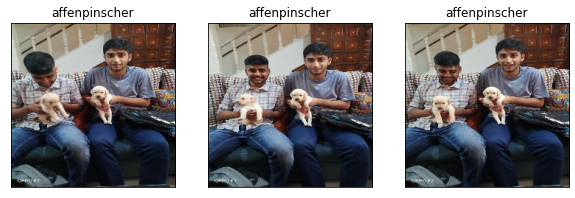

In [ ]:
plt.figure(figsize = (10,10))
for i,image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels)
  plt.imshow(image)